Q1.1

In [42]:
# importing the required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv('logs/TPBench_log.csv',index_col=False)
df.head()

,time,W,usage_c0,usage_c1,usage_c2,usage_c3,usage_c4,usage_c5,usage_c6,usage_c7,temp4,temp5,temp6,temp7
0,1.676067e+09,0.000,0.041,0.235,0.0,0.020,0.86,0.040,0.000,0.0,49.0,37.0,38.0,34.0
1,1.676067e+09,5.305,0.095,0.100,0.0,0.000,1.00,0.000,0.000,0.0,50.0,38.0,38.0,35.0
2,1.676067e+09,5.305,0.000,0.053,0.0,0.000,1.00,0.048,0.000,0.0,51.0,38.0,39.0,35.0
3,1.676067e+09,5.305,0.050,0.100,0.0,0.048,1.00,0.048,0.050,0.0,51.0,39.0,39.0,35.0
4,1.676067e+09,5.305,0.000,0.050,0.0,0.000,1.00,0.000,0.048,0.0,52.0,39.0,40.0,36.0


In [43]:
# add some columns to dataframe
df['adjusted_time'] = df['time'].to_numpy() - df['time'].to_numpy()[0]

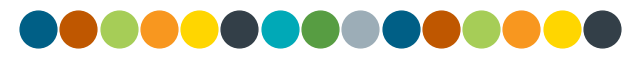

In [44]:
# you can't stop me from doing this
# https://brand.utexas.edu/identity/color/
import random
from cycler import cycler

random.Random(12).shuffle(colors := '#bf5700 #f8971f #ffd600 #a6cd57 #579d42 #00a9b7 #005f86 #9cadb7 #333f48'.split(' '))
plt.figure(figsize=(8,0.5))
for i in range(15): plt.scatter(i,0,s=700)
plt.axis('off')
plt.show()
plt.rc('axes', prop_cycle=cycler(color=colors))

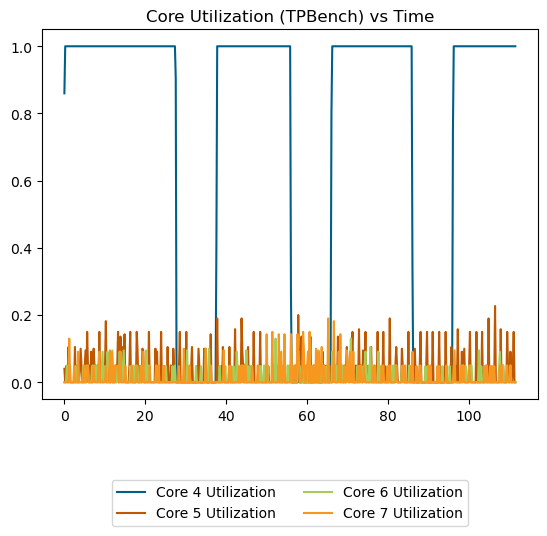

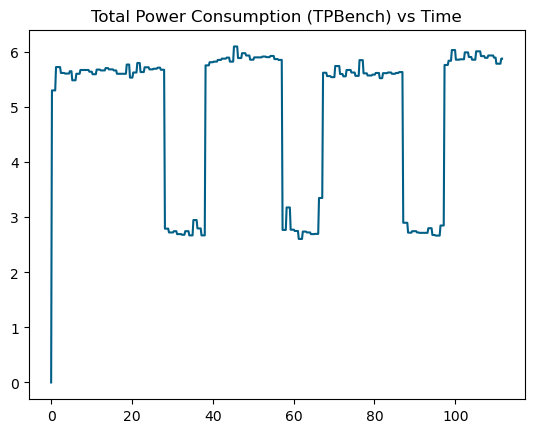

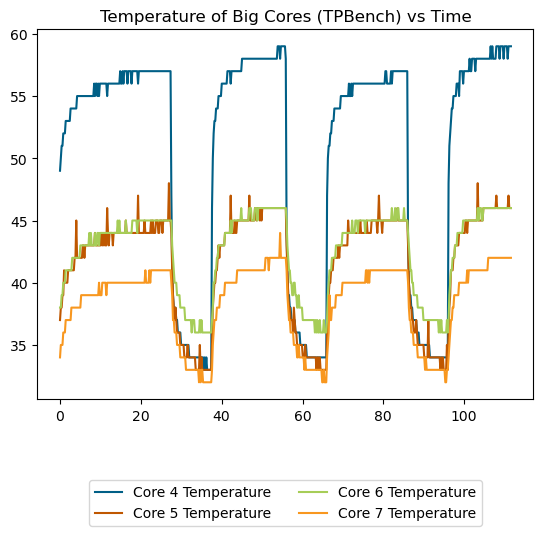

In [45]:
def plot_cores(df:pd.DataFrame, cores:list[int], x_col:str, y_col:str, label:str):
    for core in cores: plt.plot(df[x_col], df[y_col.format(core)], label=label.format(core))

plt.figure()
plt.title('Core Utilization (TPBench) vs Time')
plot_cores(df, [4,5,6,7],'adjusted_time', 'usage_c{}', 'Core {} Utilization')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.show()

plt.figure()
plt.title('Total Power Consumption (TPBench) vs Time')
plt.plot(df['adjusted_time'],df['W'])
plt.show()

plt.figure()
plt.title('Temperature of Big Cores (TPBench) vs Time')
plot_cores(df, [4,5,6,7], 'adjusted_time', 'temp{}', 'Core {} Temperature')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.show()


Q1.3

In [46]:
df_blackscholes = pd.read_csv('logs/blackscholes_log.csv',index_col=False)
time_blackscholes = df['time']
print(df_blackscholes.head())

df_bodytrack = pd.read_csv('logs/bodytrack_log.csv',index_col=False)
time_bodytrack = df['time']
print(df_bodytrack.head())

           time      W  usage_c0  usage_c1  usage_c2  usage_c3  usage_c4  \
0  1.676068e+09  0.000     0.169     0.034     0.179       0.0     0.017   
1  1.676068e+09  0.000     0.150     0.000     0.143       0.0     0.000   
2  1.676068e+09  0.000     0.053     0.000     0.050       0.0     0.095   
3  1.676068e+09  0.000     0.053     0.000     0.100       0.0     0.053   
4  1.676068e+09  5.153     0.150     0.000     0.053       0.0     0.000   

   usage_c5  usage_c6  usage_c7  temp4  temp5  temp6  temp7  
0     0.069     0.017     0.966   35.0   36.0   39.0   43.0  
1     0.000     0.000     1.000   36.0   36.0   40.0   43.0  
2     0.000     0.000     1.000   39.0   37.0   40.0   44.0  
3     0.000     0.091     1.000   37.0   37.0   40.0   44.0  
4     0.000     0.000     1.000   37.0   37.0   41.0   45.0  
           time     W  usage_c0  usage_c1  usage_c2  usage_c3  usage_c4  \
0  1.676068e+09  0.00     0.267     0.176     0.786     0.000     0.533   
1  1.676068e+09  0.00

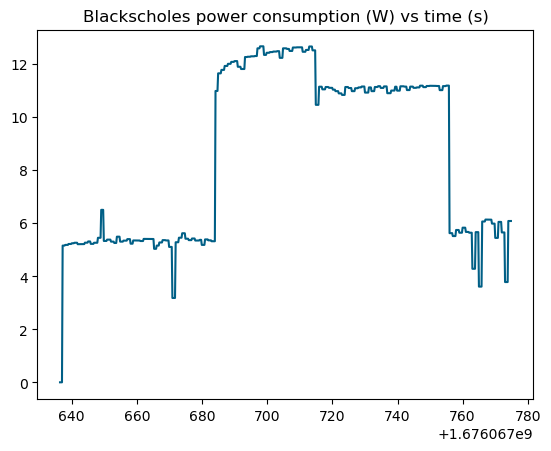

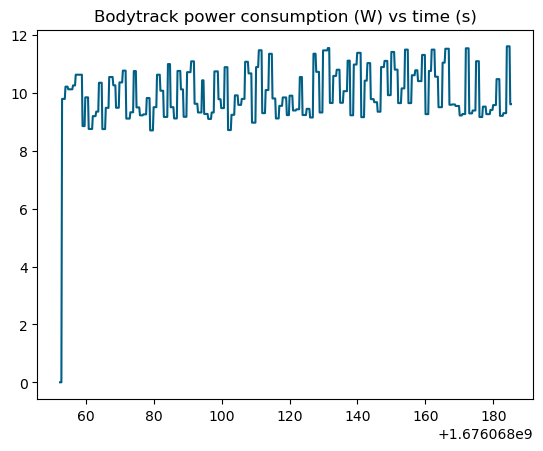

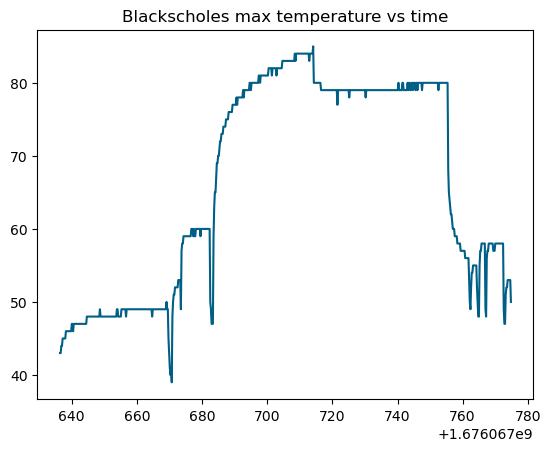

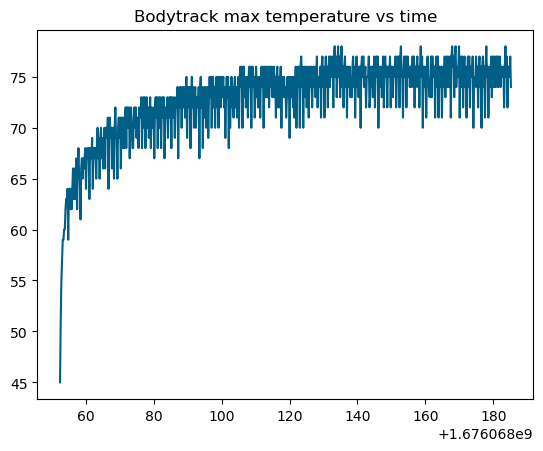

In [47]:
plt.figure()
plt.title("Blackscholes power consumption (W) vs time (s)")
plt.plot(df_blackscholes['time'],df_blackscholes['W'], label='Blackscholes')
plt.show()

plt.figure()
plt.title("Bodytrack power consumption (W) vs time (s)")
plt.plot(df_bodytrack['time'],df_bodytrack['W'], label='Bodytrack')
plt.show()

df_bs_temp = df_blackscholes[['temp4','temp5','temp6','temp7']]
df_bt_temp = df_bodytrack[['temp4','temp5','temp6','temp7']]
df_bs_temp_max = df_bs_temp.max(axis=1)
df_bt_temp_max = df_bt_temp.max(axis=1)

plt.figure()
plt.title("Blackscholes max temperature vs time")
plt.plot(df_blackscholes['time'],df_bs_temp_max, label='max')
plt.show()

plt.figure()
plt.title("Bodytrack max temperature vs time")
plt.plot(df_bodytrack['time'],df_bt_temp_max, label='Bodytrack (max temp)')
plt.show()


In [48]:
print("blackscholes runtime:", df_blackscholes['time'].max() - df_blackscholes['time'].min())
print("bodytrack runtime:", df_bodytrack['time'].max() - df_bodytrack['time'].min())
print("blackscholes avg power consumption:", df_blackscholes['W'].mean())
print("bodytrack avg power consumption:", df_bodytrack['W'].mean())
print("blackscholes avg max temperature:", df_bs_temp_max.mean())
print("bodytrack avg max temperature:", df_bt_temp_max.mean())
print("blackscholes absolute max temperature:", df_bs_temp_max.max())
print("bodytrack absolute max temperature:", df_bt_temp_max.max())
print("blackscholes energy:", df_blackscholes['W'].sum() / (df_blackscholes['time'].max() - df_blackscholes['time'].min()))
print("bodytrack energy:", df_bodytrack['W'].sum() / (df_bodytrack['time'].max() - df_bodytrack['time'].min()))

blackscholes runtime: 138.40880370140076
bodytrack runtime: 132.78010773658752
blackscholes avg power consumption: 8.545550724637682
bodytrack avg power consumption: 9.967506807866869
blackscholes avg max temperature: 66.21014492753623
bodytrack avg max temperature: 72.77155824508321
blackscholes absolute max temperature: 85.0
bodytrack absolute max temperature: 78.0
blackscholes energy: 42.60155309716275
bodytrack energy: 49.61979706380773
